# Data Analysis Process

## Process
We will use the CRISP-DM methodology, https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining.

|<img src="https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png" width="600"> | 
|:--:| 
| <center>*CRISP-DM*</center> |


## Business Understanding

### Cost/Benefit
We wish to explore the realtionship between age, height and weight. Is age or height a better predictor of weight? Is there a link between gender and weight?
Cost is 1 data analyst for 2 hours.
Benefit is insight into weight given the sample size.

### Constraints
Data protection - anonymised open data. 
Resource - 1 analyst for 2 hours.

## Data Understanding
Load data and perform EDA. Simple data plots/distributions and investigate attribute interactions and data Quality Issues

### Load data and basic libraries

In [5]:
# Load packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy import stats

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./data"))

['500_Person_Gender_Height_Weight_Index.csv', 'AgeWeightHeightMen.csv', 'age_weight_height_gender.csv', 'fat.dat.txt', 'fat.txt', 'fortune500.csv']


### Data Frame
A data frame is a wo-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).The primary pandas data structure.

In [6]:
df = pd.read_csv('./data/age_weight_height_gender.csv')

In [7]:
df.head()

,Age,Weight,Height,Gender
0,21,65.6,174.0,Male
1,23,71.8,175.3,Male
2,28,80.7,193.5,Male
3,23,72.6,186.5,Male
4,22,78.8,187.2,Male


In [8]:
df.tail()

,Age,Weight,Height,Gender
502,29,71.8,176.5,Female
503,21,55.5,164.4,Female
504,33,48.6,160.7,Female
505,33,66.4,174.0,Female
506,38,67.3,163.8,Female


In [9]:
df.shape

(507, 4)

In [10]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 4 columns):
Age       507 non-null int64
Weight    507 non-null float64
Height    507 non-null float64
Gender    507 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [152]:
df.describe()

,Age,Weight,Height
count,507.000000,507.000000,507.000000
mean,30.181460,69.147535,171.143787
std,9.608472,13.345762,9.407205
min,18.000000,42.000000,147.200000
25%,23.000000,58.400000,163.800000
50%,27.000000,68.200000,170.300000
75%,36.000000,78.850000,177.800000
max,67.000000,116.400000,198.100000


### Basic Stats
* df.mean()Returns the mean of all columns
* df.corr()Returns the correlation between columns in a data frame
* df.count()Returns the number of non-null values in each data frame column
* df.max()Returns the highest value in each column
* df.min()Returns the lowest value in each column
* df.median()Returns the median of each column
* df.std()Returns the standard deviation of each column

### Selecting Data
 You can select a column (df[col]) and return column with label col as Series or a few columns (df[[col1, col2]]) and returns columns as a new DataFrame. You can select by position (s.iloc[0]), or by index (s.loc['index_one']) . In order to select the first row you can use df.iloc[0,:] and in order to select the first element of the first column you would run df.iloc[0,0].

In [11]:
df.median()

Age        27.0
Weight     68.2
Height    170.3
dtype: float64

In [12]:
df["Weight"].head()

0    65.6
1    71.8
2    80.7
3    72.6
4    78.8
Name: Weight, dtype: float64

In [13]:
df[["Gender","Height"]].head()

,Gender,Height
0,Male,174.0
1,Male,175.3
2,Male,193.5
3,Male,186.5
4,Male,187.2


In [16]:
df.iloc[506]

Age           38
Weight      67.3
Height     163.8
Gender    Female
Name: 506, dtype: object

In [22]:
df.iloc[480:506,1:4]

,Weight,Height,Gender
480,58.2,154.9,Female
481,81.8,162.6,Female
482,63.6,175.3,Female
483,53.4,171.4,Female
484,54.5,157.5,Female
485,53.6,165.1,Female
486,60.0,160.0,Female
487,73.6,174.0,Female
488,61.4,162.6,Female
489,55.5,174.0,Female


In [23]:
df.iloc[0,3]

'Male'

In [27]:
### Filter, Sort and Groupby
df[df["Height"] > 198] 

,Age,Weight,Height,Gender
126,27,85.5,198.1,Male


In [28]:
df.sort_values("Height").head()

,Age,Weight,Height,Gender
262,25,49.8,147.2,Female
369,26,44.8,149.5,Female
493,31,46.8,149.9,Female
348,31,73.2,151.1,Female
317,35,48.7,151.1,Female


In [29]:
df.groupby("Gender").count()

,Age,Weight,Height
Gender,,,
Female,260,260,260
Male,247,247,247


In [163]:
df.groupby(["Age","Gender"]).count()

Weight  Height
Age Gender                
18  Female       3       3
    Male         1       1
19  Female      20      20
    Male         2       2
20  Female      25      25
    Male         9       9
21  Female      12      12
    Male        13      13
22  Female      13      13
    Male        15      15
23  Female      19      19
    Male        20      20
24  Female      13      13
    Male        15      15
25  Female      19      19
    Male        15      15
26  Female      12      12
    Male        11      11
27  Female       8       8
    Male        13      13
28  Female       9       9
    Male         8       8
29  Female       9       9
    Male        13      13
30  Female       5       5
    Male        10      10
31  Female       4       4
    Male         4       4
32  Female      16      16
    Male         4       4
...            ...     ...
42  Female       2       2
    Male         5       5
43  Female       1       1
    Male         7       7
44  Female       4       4
    Male         6       6
45  Female       4       4
    Male         6       6
46  Female       2       2
    Male         4       4
47  Female       1       1
48  Female       1       1
    Male         3       3
49  Female       1       1
    Male         2       2
50  Male         1       1
51  Male         3       3
52  Female       2       2
    Male         2       2
53  Female       1       1
    Male         1       1
54  Male         1       1
55  Male         3       3
56  Female       1       1
    Male         1       1
60  Male         1       1
62  Male         3       3
64  Female       1       1
65  Male         1       1
67  Female       1       1

[78 rows x 2 columns]

### Check for Missing Values
This function takes a scalar or array-like object and indictates whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).
If there were missing values, one strategy is to impute the missing values, i.e., to infer them from the known part of the data. 

In [30]:
df.isnull().any()

Age       False
Weight    False
Height    False
Gender    False
dtype: bool

### Check for Outliers
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured (Wikipedia).
Any z-score greater than 3 or less than -3 is considered to be an outlier. This rule of thumb is based on the empirical rule. From this rule we see that almost all of the data (99.7%) should be within three standard deviations from the mean.
http://colingorrie.github.io/outlier-detection.html

In [38]:
z = np.abs(stats.zscore(df["Height"]))
print(np.where(z > 3))

(array([], dtype=int64),)


In [37]:
print(z[126])
print(df.iloc[126,])

2.8683159196330337
Age          27
Weight     85.5
Height    198.1
Gender     Male
Name: 126, dtype: object


### Importing visualization and plotting libraries

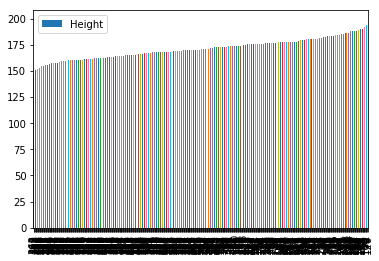

In [40]:
#df.plot.bar() oops
#df.plot.bar(y="Height")
df.sort_values("Height").plot.bar(y="Height")

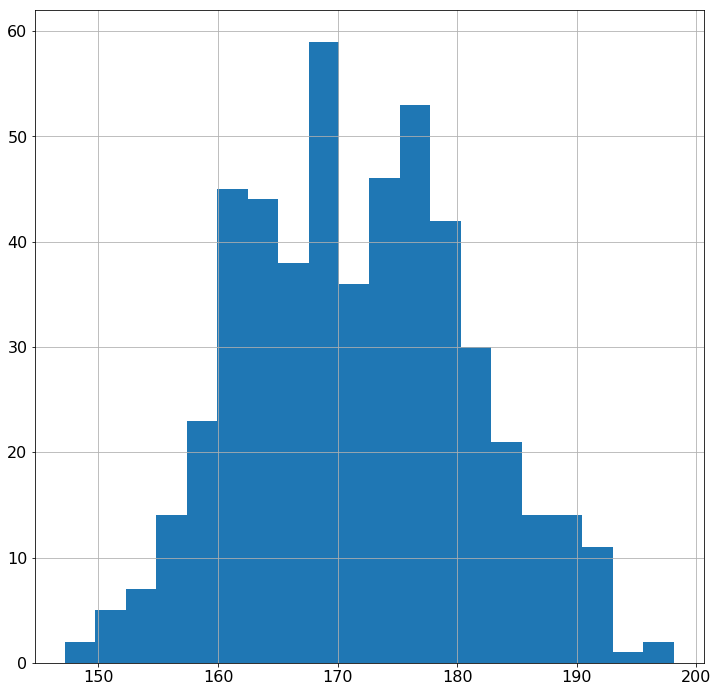

In [229]:
df["Height"].hist(bins=20, figsize=(12, 12))

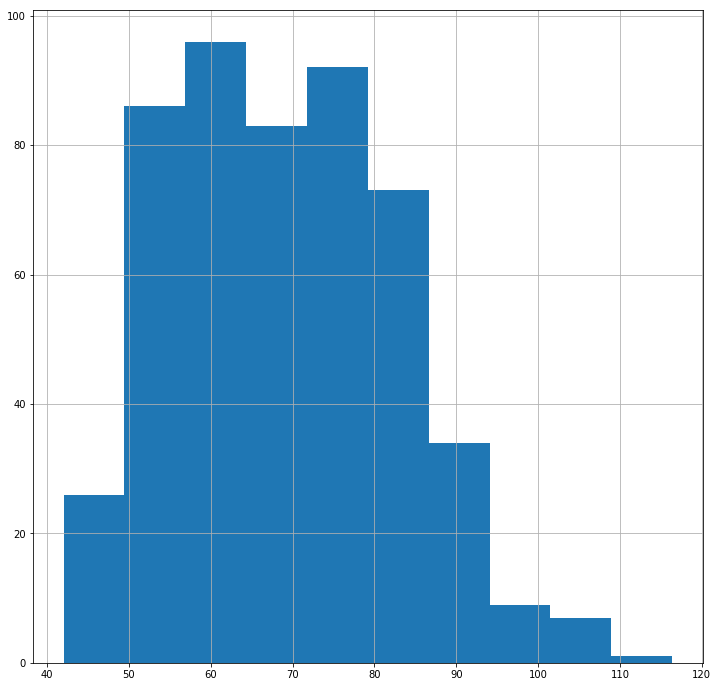

In [41]:
df["Weight"].hist(bins=10, figsize=(12, 12))

In [42]:
df["Gender"].value_counts(ascending=True)

Male      247
Female    260
Name: Gender, dtype: int64

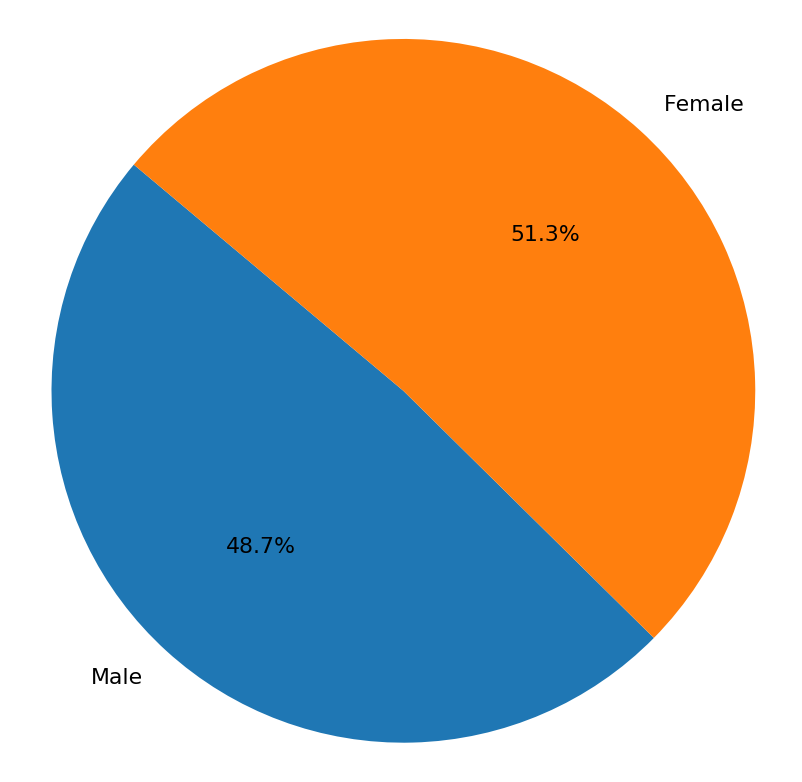

In [43]:
import matplotlib.pyplot as plt

bmi_category_counts = df["Gender"].value_counts(ascending=True)

# Data to plot
labels = 'Male', 'Female'
 
# Plot
plt.figure(figsize=(14, 14))
plt.rcParams['font.size'] = 22
plt.pie(bmi_category_counts, labels=labels, 
        autopct='%1.1f%%',  startangle=140)
 
plt.axis('equal')
plt.show()

# To be continued